In [166]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Load the data from the Excel file
file_path = './Petroleo.xls'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head() 


,Periodos,Mineria
0,1984/01,2629.0
1,1984/02,2714.0
2,1984/03,2667.0
3,1984/04,2781.0
4,1984/05,2801.0


In [204]:
file_path = './Petroleo.xls'
data = pd.read_excel(file_path)

data['Periodos'] = pd.to_datetime(data['Periodos'])

# Extraer año y mes
data['Year'] = data['Periodos'].dt.year
data['Month'] = data['Periodos'].dt.month

data['Change'] = (data['Mineria'] > 2600).astype(int)
data = data[data['Year'] <= 2020]

X = data[['Year', 'Month']]
y = data['Change']

print(data[['Periodos', 'Year', 'Month', 'Mineria', 'Change']].head(10))




    Periodos  Year  Month  Mineria  Change
0 1984-01-01  1984      1   2629.0       1
1 1984-02-01  1984      2   2714.0       1
2 1984-03-01  1984      3   2667.0       1
3 1984-04-01  1984      4   2781.0       1
4 1984-05-01  1984      5   2801.0       1
5 1984-06-01  1984      6   2816.0       1
6 1984-07-01  1984      7   2728.0       1
7 1984-08-01  1984      8   2571.0       0
8 1984-09-01  1984      9   2599.0       0
9 1984-10-01  1984     10   2564.0       0


C:\Users\yourk\AppData\Local\Temp\ipykernel_9168\785743219.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Periodos'] = pd.to_datetime(data['Periodos'])


In [205]:


X = data[['Year', 'Month']]  
y = data['Change']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)





In [206]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',  
    metrics=['accuracy']  
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [207]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose = False
)

Restoring model weights from the end of the best epoch: 200.


In [208]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7665 - loss: 0.4711 
Loss: 0.47794392704963684
Accuracy: 77.53%


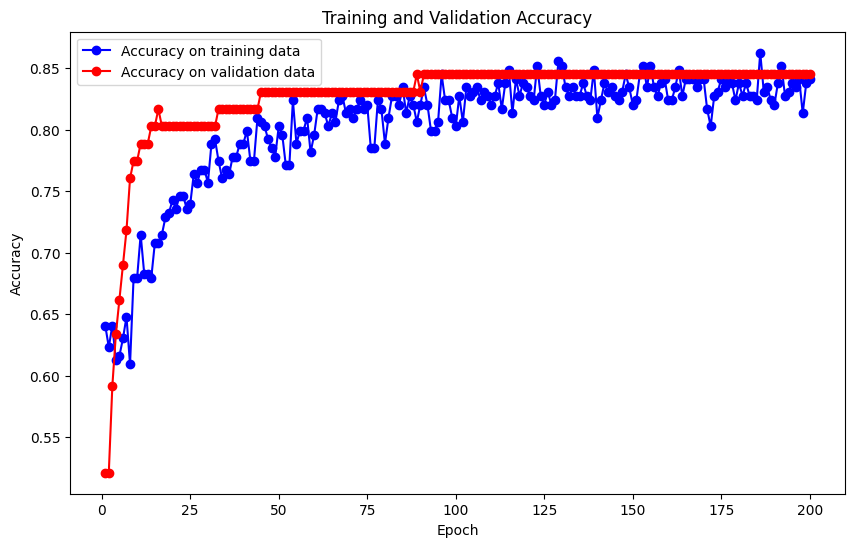

In [209]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo-', label='Accuracy on training data')
plt.plot(epochs, val_acc, 'ro-', label='Accuracy on validation data')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [210]:
data_futuro = pd.DataFrame({
    'Year': [2014, 2017, 2024],  # Ejemplo de años futuros
    'Month': [6, 9, 10]  # Ejemplo de meses futuros
})

X_futuro_scaled = scaler.transform(data_futuro)

predicciones = model.predict(X_futuro_scaled)

predicciones_binarias = (predicciones > 0.5).astype(int)

data_futuro['Prediction'] = predicciones_binarias
print(data_futuro)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
   Year  Month  Prediction
0  2014      6           0
1  2017      9           0
2  2024     10           0
